In [334]:
import pandas as pd
import matplotlib.pyplot as plt


In [335]:
log_file_path = 'evanns/hello6.log'
# Reading the .log file into a pandas DataFrame
df_log = pd.read_csv(log_file_path, header=0)

# Display the first few rows to confirm successful import
df_log.head()

,time,vx,vy,vz,wx,wy,wz,x,y,z,...,x_error,y_error,z_error,psi_error,v_fx,v_fy,v_fz,v_tz,solve_time,metadata
0,0.01,-0.000067,0.000477,0.000926,-0.003708,-0.000524,0.000515,1.850000,1.000000,-1.500000,...,1.850067,0.999523,-1.500926,0.003708,0.0,0.000000,0.0,0.000000,55141836,2500.0
1,0.02,-0.000135,0.000954,0.001849,-0.007412,-0.001048,0.001030,1.849999,1.000005,-1.499991,...,1.850133,1.000145,-1.500750,0.010553,0.0,-0.023748,0.0,-0.004047,55141836,0.01
2,0.03,-0.000252,0.001765,0.003454,-0.013702,-0.001960,0.001905,1.849998,1.000014,-1.499972,...,1.850246,1.000434,-1.501255,0.019986,0.0,-0.022634,0.0,-0.004101,69234410,[[20]\n [30]\n [30]\n [30]]
3,0.04,-0.000370,0.002576,0.005054,-0.019977,-0.002870,0.002778,1.849995,1.000032,-1.499938,...,1.850354,1.000723,-1.501756,0.029401,0.0,-0.021867,0.0,-0.004176,69234410,0
4,0.05,-0.000525,0.003620,0.007144,-0.028045,-0.004072,0.003902,1.849992,1.000058,-1.499887,...,1.850498,1.000778,-1.502746,0.040612,0.0,-0.021204,0.0,-0.004256,72282658,0


In [348]:
df_log['solve_time'].mean() * 1e-9

0.0651228603864

In [346]:
def plot_adjusted_avg_and_max_xyz_vs_reference(df):
    fig, axs = plt.subplots(4, 4, figsize=(20, 12), sharex=False)
    time_max = df['time'].max()
    time_min = df['time'].min()
    x_lim = (time_min-1, time_max+1)
    
    # Maximum values
    max_fx = 0.035
    max_fy = 0.035
    max_fz = 0.2
    max_tz = 0.001

    # Calculate average values
    avg_fx = df['fx'].mean()
    avg_fy = df['fy'].mean()
    avg_fz = df['fz'].mean()
    avg_tz = df['tauz'].mean()

    # Add some margin to cover both average and max values
    margin_fx = max(max_fx, abs(avg_fx)) * 1.2
    margin_fy = max(max_fy, abs(avg_fy)) * 1.2
    margin_fz = max(max_fz, abs(avg_fz)) * 1.2
    margin_tz = max(max_tz, abs(avg_tz)) * 1.2

    # Row 1: Plot x, y, z, psi vs references
    # plot x vs x_ref
    axs[0, 0].plot(df['time'], df['x'], label='x', color='red')
    axs[0, 0].plot(df['time'], df['x_ref'], label='x_ref', color='blue', linestyle='--')
    axs[0, 0].set_ylabel('x / x_ref')
    axs[0, 0].set_xlabel('time')
    axs[0, 0].legend()
    axs[0, 0].set_xlim(x_lim)

    # plot y vs y_ref
    axs[0, 1].plot(df['time'], df['y'], label='y', color='red')
    axs[0, 1].plot(df['time'], df['y_ref'], label='y_ref', color='blue', linestyle='--')
    axs[0, 1].set_ylabel('y / y_ref')
    axs[0, 1].set_xlabel('time')
    axs[0, 1].legend()
    axs[0, 1].set_xlim(x_lim)

    # plot z vs z_ref
    axs[0, 2].plot(df['time'], -1*df['z'], label='z', color='red')
    axs[0, 2].plot(df['time'], -1*df['z_ref'], label='z_ref', color='blue', linestyle='--')
    axs[0, 2].set_ylabel('z / z_ref')
    axs[0, 2].set_xlabel('time')
    axs[0, 2].legend()
    axs[0, 2].set_xlim(x_lim)
    axs[0, 2].set_ylim(0,-1*df['z'].min()+.1)


    # plot psi vs psi_ref
    axs[0, 3].plot(df['time'], df['psi'], label='psi', color='red')
    axs[0, 3].plot(df['time'], df['psi_ref'], label='psi_ref', color='blue', linestyle='--')
    axs[0, 3].set_ylabel('psi / psi_ref')
    axs[0, 3].set_xlabel('time')
    axs[0, 3].legend()
    axs[0, 3].set_xlim(x_lim)

    # Row 2: Plot cross comparisons (x vs y, x vs z, y vs z, time vs solve_time)
    # plot x vs y and x_ref vs y_ref
    axs[1, 0].plot(df['x'], df['y'], label='x vs y', color='red')
    axs[1, 0].plot(df['x_ref'], df['y_ref'], label='x_ref vs y_ref', color='blue', linestyle='--')
    axs[1, 0].set_ylabel('y')
    axs[1, 0].set_xlabel('x')
    axs[1, 0].legend()

    # plot x vs z and x_ref vs z_ref
    axs[1, 1].plot(df['x'], -1*df['z'], label='x vs z', color='red')
    axs[1, 1].plot(df['x_ref'], -1*df['z_ref'], label='x_ref vs z_ref', color='blue', linestyle='--')
    axs[1, 1].set_ylabel('z')
    axs[1, 1].set_xlabel('x')
    axs[1, 1].set_ylim(0,-1*df['z'].min()+.1)

    axs[1, 1].legend()

    # plot y vs z and y_ref vs z_ref
    axs[1, 2].plot(df['y'], -1*df['z'], label='y vs z', color='red')
    axs[1, 2].plot(df['y_ref'], -1*df['z_ref'], label='y_ref vs z_ref', color='blue', linestyle='--')
    axs[1, 2].set_ylabel('z')
    axs[1, 2].set_xlabel('y')
    axs[1, 2].set_ylim(0,-1*df['z'].min()+.1)

    axs[1, 2].legend()

    # plot time vs solve_time
    axs[1, 3].plot(df['time'], df['solve_time']* 1e-9, label='solve_time', color='purple')
    axs[1, 3].set_ylabel('solve_time')
    axs[1, 3].set_xlabel('time')
    axs[1, 3].legend()
    axs[1, 3].set_xlim(x_lim)

    # Row 3: Plot fx, fy, fz, tauz vs time
    # plot fx vs time
    axs[2, 0].plot(df['time'], df['fx'], label='fx', color='blue')
    axs[2, 0].axhline(y=max_fx, color='red', linestyle='--', label=f'+{max_fx}')
    axs[2, 0].axhline(y=-max_fx, color='red', linestyle='--', label=f'-{max_fx}')
    axs[2, 0].set_ylabel('fx')
    axs[2, 0].set_xlabel('time')
    axs[2, 0].legend()
    axs[2, 0].set_ylim((-margin_fx, margin_fx))
    axs[2, 0].set_xlim(x_lim)

    # plot fy vs time
    axs[2, 1].plot(df['time'], df['fy'], label='fy', color='orange')
    axs[2, 1].axhline(y=max_fy, color='red', linestyle='--', label=f'+{max_fy}')
    axs[2, 1].axhline(y=-max_fy, color='red', linestyle='--', label=f'-{max_fy}')
    axs[2, 1].set_ylabel('fy')
    axs[2, 1].set_xlabel('time')
    axs[2, 1].legend()
    axs[2, 1].set_ylim((-margin_fy, margin_fy))
    axs[2, 1].set_xlim(x_lim)

    # plot fz vs time
    axs[2, 2].plot(df['time'], df['fz'], label='fz', color='green')
    axs[2, 2].axhline(y=max_fz, color='red', linestyle='--', label=f'+{max_fz}')
    axs[2, 2].axhline(y=-max_fz, color='red', linestyle='--', label=f'-{max_fz}')
    axs[2, 2].set_ylabel('fz')
    axs[2, 2].set_xlabel('time')
    axs[2, 2].legend()
    axs[2, 2].set_ylim((-margin_fz, margin_fz))
    axs[2, 2].set_xlim(x_lim)

    # plot tauz vs time
    axs[2, 3].plot(df['time'], df['tauz'], label='tauz', color='purple')
    axs[2, 3].axhline(y=max_tz, color='red', linestyle='--', label=f'+{max_tz}')
    axs[2, 3].axhline(y=-max_tz, color='red', linestyle='--', label=f'-{max_tz}')
    axs[2, 3].set_ylabel('tauz')
    axs[2, 3].set_xlabel('time')
    axs[2, 3].legend()
    axs[2, 3].set_ylim((-margin_tz, margin_tz))
    axs[2, 3].set_xlim(x_lim)

    # Row 4: Plot v_fx, v_fy, v_fz, v_tz vs time
    # plot v_fx vs time
    axs[3, 0].plot(df['time'], df['v_fx'], label='cbf_fx', color='blue')
    axs[3, 0].set_ylabel('v_fx')
    axs[3, 0].set_xlabel('time')
    axs[3, 0].legend()
    axs[3, 0].set_xlim(x_lim)

    # plot v_fy vs time
    axs[3, 1].plot(df['time'], df['v_fy'], label='cbf_fy', color='orange')
    axs[3, 1].set_ylabel('v_fy')
    axs[3, 1].set_xlabel('time')
    axs[3, 1].legend()
    axs[3, 1].set_xlim(x_lim)

    # plot v_fz vs time
    axs[3, 2].plot(df['time'], df['v_fz'], label='cbf_fz', color='green')
    axs[3, 2].set_ylabel('v_fz')
    axs[3, 2].set_xlabel('time')
    axs[3, 2].legend()
    axs[3, 2].set_xlim(x_lim)

    # plot v_tz vs time
    axs[3, 3].plot(df['time'], df['v_tz'], label='cbf_tauz', color='purple')
    axs[3, 3].set_ylabel('v_tauz')
    axs[3, 3].set_xlabel('time')
    axs[3, 3].legend()
    axs[3, 3].set_xlim(x_lim)
    

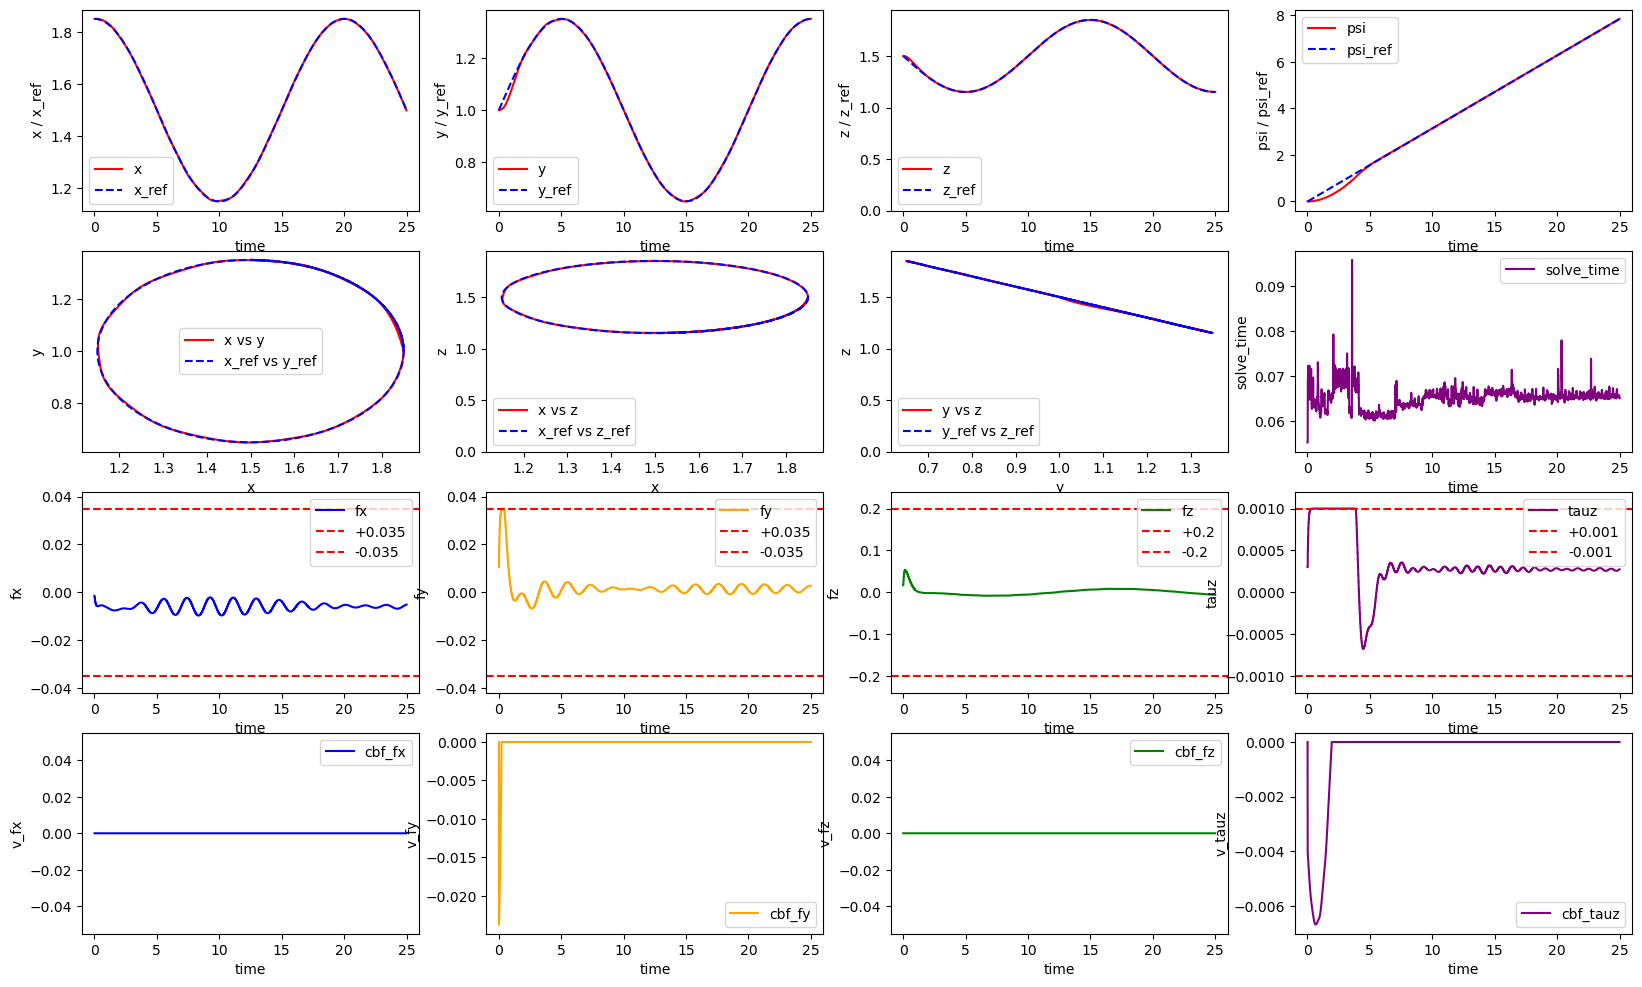

In [347]:
# Reuse the plotting function defined earlier for the uploaded .log data
plot_adjusted_avg_and_max_xyz_vs_reference(df_log)

In [338]:
import numpy as np

In [339]:
C = np.zeros([4,12])

C[0,6],C[1,7], C[2,8], C[3,11] = 1,1,1,1

In [340]:
x,y,z,phi,theta,psi,vx,vy,vz,wx,wy,wz = np.arange(12)

In [341]:
eta_bn_n = np.array([x, y, z, phi, theta, psi]).reshape((6,1))
nu_bn_b = np.array([vx, vy, vz, wx, wy, wz]).reshape((6,1))


nonlin_pred = np.concatenate((nu_bn_b, eta_bn_n),axis=0)

In [342]:
nonlin_pred

array([[ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5]])

In [343]:
# def plot_xyz_psi_vs_reference(df, x_lim=None, y_lim=None, z_lim=None, psi_lim=None):
#     fig, axs = plt.subplots(1, 4, figsize=(20, 10), sharex=True)

#     # Plot x vs. x_ref
#     axs[0].plot(df['time'], df['x'], label='x', color='blue')
#     axs[0].plot(df['time'], df['x_ref'], label='x_ref', color='red', linestyle='dashed')
#     axs[0].set_ylabel('x / x_ref')
#     axs[0].legend()
#     if x_lim:  # Set y-axis limit for x plot if provided
#         axs[0].set_ylim(x_lim)

#     # Plot y vs. y_ref
#     axs[1].plot(df['time'], df['y'], label='y', color='green')
#     axs[1].plot(df['time'], df['y_ref'], label='y_ref', color='red', linestyle='dashed')
#     axs[1].set_ylabel('y / y_ref')
#     axs[1].legend()
#     if y_lim:  # Set y-axis limit for y plot if provided
#         axs[1].set_ylim(y_lim)

#     # Plot z vs. z_ref
#     axs[2].plot(df['time'], df['z'], label='z', color='orange')
#     axs[2].plot(df['time'], df['z_ref'], label='z_ref', color='red', linestyle='dashed')
#     axs[2].set_ylabel('z / z_ref')
#     axs[2].legend()
#     if z_lim:  # Set y-axis limit for z plot if provided
#         axs[2].set_ylim(z_lim)

#     # Plot psi vs. psi_ref
#     axs[3].plot(df['time'], df['psi'], label='psi', color='purple')
#     axs[3].plot(df['time'], df['psi_ref'], label='psi_ref', color='red', linestyle='dashed')
#     axs[3].set_ylabel('psi / psi_ref')
#     axs[3].set_xlabel('Time')
#     axs[3].legend()
#     if psi_lim:  # Set y-axis limit for psi plot if provided
#         axs[3].set_ylim(psi_lim)

#     plt.show()


# def plot_xyz_psi_vs_reference(df, x_lim=None, y_lim=None, z_lim=None, psi_lim=None):
#     # Calculate the average values of x, y, and z
#     avg_x = df['x'].mean()
#     avg_y = df['y'].mean()
#     avg_z = df['z'].mean()

#     wiggle_room = 1  # 1 meter of wiggle room

#     x_range_avg = (avg_x - wiggle_room, avg_x + wiggle_room)
#     y_range_avg = (avg_y - wiggle_room, avg_y + wiggle_room)
#     z_range_avg = (avg_z - wiggle_room, avg_z + wiggle_room)

#     time_min = df['time'].min() - 1
#     time_max = df['time'].max() + 2

#     # First set of subplots for time vs x/y/z/psi
#     fig, axs = plt.subplots(1, 4, figsize=(20, 3), sharex=False)

#     # Plot x vs. x_ref
#     axs[0].plot(df['time'], df['x'], label='x', color='blue')
#     axs[0].plot(df['time'], df['x_ref'], label='x_ref', color='red', linestyle='dashed')
#     axs[0].set_ylabel('x / x_ref')
#     axs[0].legend()
#     axs[0].set_xlim((time_min, time_max))
#     axs[0].set_ylim((avg_x - 2, avg_x + 2))  # 2 meters range for x based on avg

#     # Plot y vs. y_ref
#     axs[1].plot(df['time'], df['y'], label='y', color='green')
#     axs[1].plot(df['time'], df['y_ref'], label='y_ref', color='red', linestyle='dashed')
#     axs[1].set_ylabel('y / y_ref')
#     axs[1].legend()
#     axs[1].set_xlim((time_min, time_max))
#     axs[1].set_ylim((avg_y - 1, avg_y + 1))  # 1 meter range for y based on avg


#     # Plot z vs. z_ref
#     axs[2].plot(df['time'], -1*df['z'], label='z', color='cyan')
#     axs[2].plot(df['time'], -1*df['z_ref'], label='z_ref', color='red', linestyle='dashed')
#     axs[2].set_ylabel('z / z_ref')
#     axs[2].legend()
#     axs[2].set_xlim((time_min, time_max))
#     axs[2].set_ylim((0, 2.))  # Adjust z based on initial value

#     # Plot psi vs. psi_ref
#     axs[3].plot(df['time'], df['psi'], label='psi', color='purple')
#     axs[3].plot(df['time'], df['psi_ref'], label='psi_ref', color='red', linestyle='dashed')
#     axs[3].set_ylabel('psi / psi_ref')
#     axs[3].set_xlabel('Time')
#     axs[3].legend()
#     axs[3].set_xlim((time_min, time_max))

#     plt.tight_layout()
#     plt.show()
    
#     # Second set of subplots for x/y/z comparisons
#     fig, axs2 = plt.subplots(1, 4, figsize=(20, 3), sharex=False)

#     # Plot x vs y as well as x_ref vs y_ref
#     axs2[0].plot(df['x'], df['y'], label='x vs y', color='blue')
#     axs2[0].plot(df['x_ref'], df['y_ref'], label='x_ref vs y_ref', color='red', linestyle='dashed')
#     axs2[0].set_ylabel('y')
#     axs2[0].set_xlabel('x')
#     axs2[0].legend()
#     axs2[0].set_xlim(x_range_avg)
#     axs2[0].set_ylim(y_range_avg)

#     # plot x vs z as well as x_ref vs z_ref
#     axs2[1].plot(df['x'], -1*df['z'], label='x vs z', color='blue')
#     axs2[1].plot(df['x_ref'], -1*df['z_ref'], label='x_ref vs z_ref', color='red', linestyle='dashed')
#     axs2[1].set_ylabel('z')
#     axs2[1].set_xlabel('x')
#     axs2[1].legend()
#     axs2[1].set_xlim(x_range_avg)
#     axs2[1].set_ylim((-1 * z_range_avg[1], -1 * z_range_avg[0]))  # Reverse z range for negative plotting

#     # plot y vs z as well as y_ref vs z_ref
#     axs2[2].plot(df['y'], -1*df['z'], label='y vs z', color='blue')
#     axs2[2].plot(df['y_ref'], -1*df['z_ref'], label='y_ref vs z_ref', color='red', linestyle='dashed')
#     axs2[2].set_ylabel('z')
#     axs2[2].set_xlabel('y')
#     axs2[2].legend()
#     axs2[2].set_xlim(y_range_avg)
#     axs2[2].set_ylim((-1 * z_range_avg[1], -1 * z_range_avg[0]))  # Reverse z range for negative plotting


#     # # plot y vs z as well as y_ref vs z_ref
#     # axs2[2].plot(df['y'], -1*df['z'], label='y vs z', color='blue')
#     # axs2[2].plot(df['y_ref'], -1*df['z_ref'], label='y_ref vs z_ref', color='red', linestyle='dashed')
#     # axs2[2].set_ylabel('z')
#     # axs2[2].set_xlabel('y')
#     # axs2[2].legend()
#     # axs2[2].set_xlim(y_range)
#     # axs2[2].set_ylim((-1 * z_range[1], -1 * z_range[0]))  # Reverse z range for negative plotting
#     avg_solve_time = df['solve_time'].mean() * 1e-9
#     print(avg_solve_time)
#     # plot solve time vs time
#     axs2[3].plot(df['time'], df['solve_time']*1e-9, label='solve_time', color='purple')
#     axs2[3].set_ylabel('solve_time')
#     axs2[3].set_xlabel('time')
#     axs2[3].legend()
#     axs2[3].set_ylim((avg_solve_time-.1, avg_solve_time+.1))
#     axs2[3].set_xlim((time_min,time_max))


#     # fig, axs3 = plt.subplots(1, 6, figsize=(20, 3), sharex=True)
#     # # Plot vx vs time
#     # axs3[0].plot(df['time'], df['vx'], label='vx', color='blue')
#     # axs3[0].set_ylabel('vx')
#     # axs3[0].set_xlabel('time')
#     # axs3[0].legend()
#     # if x_lim and y_lim:  # Set y-axis limit for x vs y plot if provided
#     #     axs3[0].set_ylim((-1.0,1.0))
#     #     axs3[0].set_xlim((-0.5,2.0))

#     # # Plot vy vs time
#     # axs3[1].plot(df['time'], df['vy'], label='vy', color='orange')
#     # axs3[1].set_ylabel('vy')
#     # axs3[1].set_xlabel('time')
#     # axs3[1].legend()
#     # if x_lim and y_lim:  # Set y-axis limit for x vs y plot if provided
#     #     axs3[1].set_ylim((-1.0,1.0))
#     #     axs3[1].set_xlim((-0.5,2.0))

#     # # Plot vz vs time
#     # axs3[2].plot(df['time'], df['vz'], label='vz', color='green')
#     # axs3[2].set_ylabel('vz')
#     # axs3[2].set_xlabel('time')
#     # axs3[2].legend()
#     # if x_lim and y_lim:  # Set y-axis limit for x vs y plot if provided
#     #     axs3[2].set_ylim((-1.0,1.0))
#     #     axs3[2].set_xlim((-0.5,2.0))

#     # # Plot wx vs time
#     # axs3[3].plot(df['time'], df['wx'], label='wx', color='purple')
#     # axs3[3].set_ylabel('wx')
#     # axs3[3].set_xlabel('time')
#     # axs3[3].legend()
#     # if x_lim and y_lim:  # Set y-axis limit for x vs y plot if provided
#     #     axs3[3].set_ylim((-1.0,1.0))
#     #     axs3[3].set_xlim((-0.5,2.0))

#     # # Plot wy vs time
#     # axs3[4].plot(df['time'], df['wy'], label='wy', color='purple')
#     # axs3[4].set_ylabel('wy')
#     # axs3[4].set_xlabel('time')
#     # axs3[4].legend()
#     # if x_lim and y_lim:  # Set y-axis limit for x vs y plot if provided
#     #     axs3[4].set_ylim((-1.0,1.0))
#     #     axs3[4].set_xlim((-0.5,2.0))

#     # # Plot wz vs time
#     # axs3[5].plot(df['time'], df['wz'], label='wz', color='purple')
#     # axs3[5].set_ylabel('wz')
#     # axs3[5].set_xlabel('time')
#     # axs3[5].legend()
#     # if x_lim and y_lim:  # Set y-axis limit for x vs y plot if provided
#     #     axs3[5].set_ylim((-1.0,1.0))
#     #     axs3[5].set_xlim((-0.5,2.0))

#     # fig, axs4 = plt.subplots(1, 4, figsize=(20, 3), sharex=True)
#     # # plot x_error vs time
#     # axs4[0].plot(df['time'], df['x_error'], label='x_error', color='blue')
#     # axs4[0].set_ylabel('x_error')
#     # axs4[0].set_xlabel('time')
#     # axs4[0].legend()
#     # if x_lim and y_lim:  # Set y-axis limit for x vs y plot if provided
#     #     axs4[0].set_ylim((-1.0,1.0))
#     #     axs4[0].set_xlim((-0.5,2.0))

#     # # plot y_error vs time
#     # axs4[1].plot(df['time'], df['y_error'], label='y_error', color='orange')
#     # axs4[1].set_ylabel('y_error')
#     # axs4[1].set_xlabel('time')
#     # axs4[1].legend()
#     # if x_lim and y_lim:  # Set y-axis limit for x vs y plot if provided
#     #     axs4[1].set_ylim((-1.0,1.0))
#     #     axs4[1].set_xlim((-0.5,2.0))

#     # # plot z_error vs time
#     # axs4[2].plot(df['time'], df['z_error'], label='z_error', color='green')
#     # axs4[2].set_ylabel('z_error')
#     # axs4[2].set_xlabel('time')
#     # axs4[2].legend()
#     # if x_lim and y_lim:  # Set y-axis limit for x vs y plot if provided
#     #     axs4[2].set_ylim((-1.0,1.0))
#     #     axs4[2].set_xlim((-0.5,2.0))

#     # # plot psi_error vs time
#     # axs4[3].plot(df['time'], df['psi_error'], label='psi_error', color='purple')
#     # axs4[3].set_ylabel('psi_error')
#     # axs4[3].set_xlabel('time')
#     # axs4[3].legend()
#     # if x_lim and y_lim:  # Set y-axis limit for x vs y plot if provided
#     #     axs4[3].set_ylim((-1.0,1.0))
#     #     axs4[3].set_xlim((-0.5,2.0))

#     fig, axs = plt.subplots(1, 4, figsize=(20, 3), sharex=False)

#     # Maximum values
#     max_fx = 0.035
#     max_fy = 0.035
#     max_fz = 0.2
#     max_tz = 0.001

#     # Calculate average values
#     avg_fx = df['fx'].mean()
#     avg_fy = df['fy'].mean()
#     avg_fz = df['fz'].mean()
#     avg_tz = df['tauz'].mean()

#     # Add some margin to cover both average and max values
#     margin_fx = max(max_fx, abs(avg_fx)) * 1.2
#     margin_fy = max(max_fy, abs(avg_fy)) * 1.2
#     margin_fz = max(max_fz, abs(avg_fz)) * 1.2
#     margin_tz = max(max_tz, abs(avg_tz)) * 1.2

#     # plot fx vs time
#     axs[0].plot(df['time'], df['fx'], label='fx', color='blue')
#     axs[0].axhline(y=max_fx, color='red', linestyle='--', label=f'+{max_fx}')
#     axs[0].axhline(y=-max_fx, color='red', linestyle='--', label=f'-{max_fx}')
#     axs[0].set_ylabel('fx')
#     axs[0].set_xlabel('time')
#     axs[0].legend()
#     axs[0].set_ylim((-margin_fx, margin_fx))  # Set y-limits based on max and avg_fx with margin
#     if x_lim:
#         axs[0].set_xlim(x_lim)

#     # plot fy vs time 
#     axs[1].plot(df['time'], df['fy'], label='fy', color='orange')
#     axs[1].axhline(y=max_fy, color='red', linestyle='--', label=f'+{max_fy}')
#     axs[1].axhline(y=-max_fy, color='red', linestyle='--', label=f'-{max_fy}')
#     axs[1].set_ylabel('fy')
#     axs[1].set_xlabel('time')
#     axs[1].legend()
#     axs[1].set_ylim((-margin_fy, margin_fy))  # Set y-limits based on max and avg_fy with margin
#     if x_lim:
#         axs[1].set_xlim(x_lim)

#     # plot fz vs time
#     axs[2].plot(df['time'], df['fz'], label='fz', color='green')
#     axs[2].axhline(y=max_fz, color='red', linestyle='--', label=f'+{max_fz}')
#     axs[2].axhline(y=-max_fz, color='red', linestyle='--', label=f'-{max_fz}')
#     axs[2].set_ylabel('fz')
#     axs[2].set_xlabel('time')
#     axs[2].legend()
#     axs[2].set_ylim((-margin_fz, margin_fz))  # Set y-limits based on max and avg_fz with margin
#     if x_lim:
#         axs[2].set_xlim(x_lim)

#     # plot tauz vs time
#     axs[3].plot(df['time'], df['tauz'], label='tauz', color='purple')
#     axs[3].axhline(y=max_tz, color='red', linestyle='--', label=f'+{max_tz}')
#     axs[3].axhline(y=-max_tz, color='red', linestyle='--', label=f'-{max_tz}')
#     axs[3].set_ylabel('tauz')
#     axs[3].set_xlabel('time')
#     axs[3].legend()
#     axs[3].set_ylim((-margin_tz, margin_tz))  # Set y-limits based on max and avg_tz with margin
#     if x_lim:
#         axs[3].set_xlim(x_lim)

#     # plt.tight_layout()
#     # plt.show()

#     # fig, axs6 = plt.subplots(1, 3, figsize=(20, 3), sharex=True) # this is for phi,theta, psi
#     # # plot phi vs time
#     # axs6[0].plot(df['time'], df['phi'], label='phi', color='blue')
#     # axs6[0].set_ylabel('phi')
#     # axs6[0].set_xlabel('time')
#     # axs6[0].legend()
#     # if x_lim and y_lim:  # Set y-axis limit for x vs y plot if provided
#     #     axs6[0].set_ylim((-1.0,1.0))
#     #     axs6[0].set_xlim((-0.5,2.0))

#     # # plot theta vs time
#     # axs6[1].plot(df['time'], df['theta'], label='theta', color='orange')
#     # axs6[1].set_ylabel('theta')
#     # axs6[1].set_xlabel('time')
#     # axs6[1].legend()
#     # if x_lim and y_lim:  # Set y-axis limit for x vs y plot if provided
#     #     axs6[1].set_ylim((-1.0,1.0))
#     #     axs6[1].set_xlim((-0.5,2.0))

#     # # plot psi vs time
#     # axs6[2].plot(df['time'], df['psi'], label='psi', color='green')
#     # axs6[2].set_ylabel('psi')
#     # axs6[2].set_xlabel('time')
#     # axs6[2].legend()
#     # if x_lim and y_lim:  # Set y-axis limit for x vs y plot if provided
#     #     axs6[2].set_ylim((-1.0,1.0))
#     #     axs6[2].set_xlim((-0.5,2.0))

    
#     # fig, axs7 = plt.subplots(1, 3, figsize=(20, 3), sharex=True) # this is for vxdot, vydot, vzdot
#     # # plot vxdot vs time
#     # axs7[0].plot(df['time'], df['vxdot'], label='vxdot', color='blue')
#     # axs7[0].set_ylabel('vxdot')
#     # axs7[0].set_xlabel('time')
#     # axs7[0].legend()
#     # if x_lim and y_lim:  # Set y-axis limit for x vs y plot if provided
#     #     axs7[0].set_ylim((-1.0,1.0))
#     #     axs7[0].set_xlim((-0.5,2.0))

#     # # plot vydot vs time
#     # axs7[1].plot(df['time'], df['vydot'], label='vydot', color='orange')
#     # axs7[1].set_ylabel('vydot')
#     # axs7[1].set_xlabel('time')
#     # axs7[1].legend()
#     # if x_lim and y_lim:  # Set y-axis limit for x vs y plot if provided
#     #     axs7[1].set_ylim((-1.0,1.0))
#     #     axs7[1].set_xlim((-0.5,2.0))

#     # # plot vzdot vs time
#     # axs7[2].plot(df['time'], df['vzdot'], label='vzdot', color='green')
#     # axs7[2].set_ylabel('vzdot')
#     # axs7[2].set_xlabel('time')
#     # axs7[2].legend()
#     # if x_lim and y_lim:  # Set y-axis limit for x vs y plot if provided
#     #     axs7[2].set_ylim((-1.0,1.0))
#     #     axs7[2].set_xlim((-0.5,2.0))

    
#     # fig, axs8 = plt.subplots(1, 3, figsize=(20, 3), sharex=True) # this is for wxdot, wydot, wzdot
#     # # plot wxdot vs time
#     # axs8[0].plot(df['time'], df['wxdot'], label='wxdot', color='blue')
#     # axs8[0].set_ylabel('wxdot')
#     # axs8[0].set_xlabel('time')
#     # axs8[0].legend()
#     # if x_lim and y_lim:  # Set y-axis limit for x vs y plot if provided
#     #     axs8[0].set_ylim((-1.0,1.0))
#     #     axs8[0].set_xlim((-0.5,2.0))

#     # # plot wydot vs time
#     # axs8[1].plot(df['time'], df['wydot'], label='wydot', color='orange')
#     # axs8[1].set_ylabel('wydot')
#     # axs8[1].set_xlabel('time')
#     # axs8[1].legend()
#     # if x_lim and y_lim:  # Set y-axis limit for x vs y plot if provided
#     #     axs8[1].set_ylim((-1.0,1.0))
#     #     axs8[1].set_xlim((-0.5,2.0))
    
#     # # plot wzdot vs time
#     # axs8[2].plot(df['time'], df['wzdot'], label='wzdot', color='green')
#     # axs8[2].set_ylabel('wzdot')
#     # axs8[2].set_xlabel('time')
#     # axs8[2].legend()
#     # if x_lim and y_lim:  # Set y-axis limit for x vs y plot if provided
#     #     axs8[2].set_ylim((-1.0,1.0))
#     #     axs8[2].set_xlim((-0.5,2.0))


#     # fig, axs9 = plt.subplots(1, 3, figsize=(20, 3), sharex=True) # this is for xdot, ydot, zdot
#     # # plot xdot vs time
#     # axs9[0].plot(df['time'], df['xdot'], label='xdot', color='blue')
#     # axs9[0].set_ylabel('xdot')
#     # axs9[0].set_xlabel('time')
#     # axs9[0].legend()
#     # if x_lim and y_lim:  # Set y-axis limit for x vs y plot if provided
#     #     axs9[0].set_ylim((-1.0,1.0))
#     #     axs9[0].set_xlim((-0.5,2.0))

#     # # plot ydot vs time
#     # axs9[1].plot(df['time'], df['ydot'], label='ydot', color='orange')
#     # axs9[1].set_ylabel('ydot')
#     # axs9[1].set_xlabel('time')
#     # axs9[1].legend()
#     # if x_lim and y_lim:  # Set y-axis limit for x vs y plot if provided
#     #     axs9[1].set_ylim((-1.0,1.0))
#     #     axs9[1].set_xlim((-0.5,2.0))

#     # # plot zdot vs time
#     # axs9[2].plot(df['time'], df['zdot'], label='zdot', color='green')
#     # axs9[2].set_ylabel('zdot')
#     # axs9[2].set_xlabel('time')
#     # axs9[2].legend()
#     # if x_lim and y_lim:  # Set y-axis limit for x vs y plot if provided
#     #     axs9[2].set_ylim((-1.0,1.0))
#     #     axs9[2].set_xlim((-0.5,2.0))

#     # # this is for phi_dot, theta_dot, psi_dot
#     # fig, axs10 = plt.subplots(1, 3, figsize=(20, 3), sharex=True)
#     # # plot phi_dot vs time
#     # axs10[0].plot(df['time'], df['phidot'], label='phidot', color='blue')
#     # axs10[0].set_ylabel('phidot')
#     # axs10[0].set_xlabel('time')
#     # axs10[0].legend()
#     # if x_lim and y_lim:  # Set y-axis limit for x vs y plot if provided
#     #     axs10[0].set_ylim((-1.0,1.0))
#     #     axs10[0].set_xlim((-0.5,2.0))

#     # # plot theta_dot vs time
#     # axs10[1].plot(df['time'], df['thetadot'], label='thetadot', color='orange')
#     # axs10[1].set_ylabel('thetadot')
#     # axs10[1].set_xlabel('time')
#     # axs10[1].legend()
#     # if x_lim and y_lim:  # Set y-axis limit for x vs y plot if provided
#     #     axs10[1].set_ylim((-1.0,1.0))
#     #     axs10[1].set_xlim((-0.5,2.0))

#     # # plot psi_dot vs time
#     # axs10[2].plot(df['time'], df['psidot'], label='psidot', color='green')
#     # axs10[2].set_ylabel('psidot')
#     # axs10[2].set_xlabel('time')
#     # axs10[2].legend()
#     # if x_lim and y_lim:  # Set y-axis limit for x vs y plot if provided
#     #     axs10[2].set_ylim((-1.0,1.0))
#     #     axs10[2].set_xlim((-0.5,2.0))

#     fig, axs11 = plt.subplots(1, 4, figsize=(20, 3), sharex=False)
#     ylim = 0.01
#     # plot v_fx vs time
#     axs11[0].plot(df['time'], df['v_fx'], label='v_fx', color='blue')
#     axs11[0].set_ylabel('v_fx')
#     axs11[0].set_xlabel('time')
#     axs11[0].legend()
#     axs11[0].set_ylim((-ylim,ylim))

#     # plot v_fy vs time
#     axs11[1].plot(df['time'], df['v_fy'], label='v_fy', color='orange')
#     axs11[1].set_ylabel('v_fy')
#     axs11[1].set_xlabel('time')
#     axs11[1].legend()
#     ylim_fy = 0.2
#     axs11[1].set_ylim((-ylim_fy,ylim_fy))

#     # plot v_fz vs time
#     axs11[2].plot(df['time'], df['v_fz'], label='v_fz', color='green')
#     axs11[2].set_ylabel('v_fz')
#     axs11[2].set_xlabel('time')
#     axs11[2].legend()
#     axs11[2].set_ylim((-ylim,ylim))

#     # plot v_tz vs time
#     axs11[3].plot(df['time'], df['v_tz'], label='v_tz', color='purple')
#     axs11[3].set_ylabel('v_tz')
#     axs11[3].set_xlabel('time')
#     axs11[3].legend()
#     axs11[3].set_ylim((-ylim,ylim))

#     # plt.tight_layout()
#     # plt.show()

    
#     plt.show()
